# Assignment 12 - Neural Networks image recognition

#### by Anchalee P Ramirez

# Neural Networks - Image Recognition 

### Use both MLNN and the ConvNet to solve the following problem.

#### 1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

C:\Users\Anchee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Multi Layer Neural Network

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [22]:
x_train_noise = x_train + np.random.rand(*x_train.shape)
x_test_noise = x_test + np.random.rand(*x_test.shape)

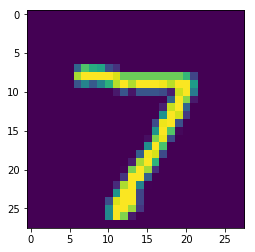

In [31]:
plt.imshow(x_test[0].reshape(28,28))

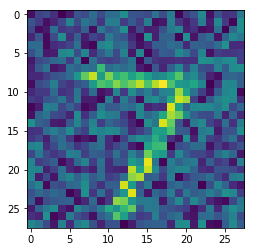

In [26]:
plt.imshow(x_test_noise[0].reshape(28,28))

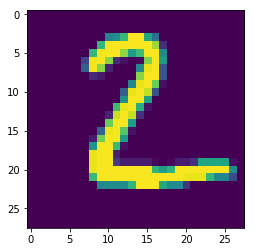

In [9]:
plt.imshow(x_test[1].reshape(28,28))

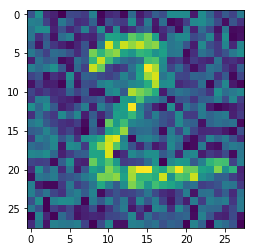

In [10]:
plt.imshow(x_test_noise[1].reshape(28,28))

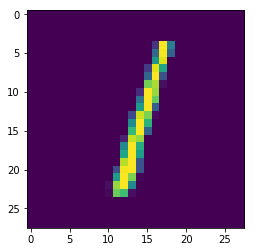

In [11]:
plt.imshow(x_test[2].reshape(28,28))

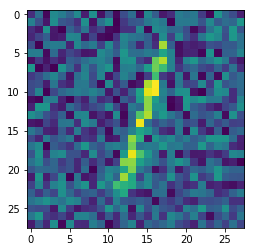

In [12]:
plt.imshow(x_test_noise[2].reshape(28,28))

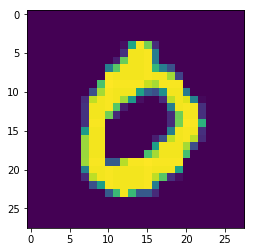

In [13]:
plt.imshow(x_test[3].reshape(28,28))

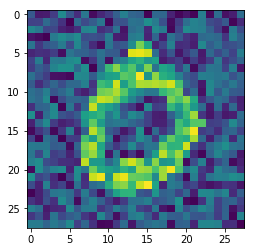

In [14]:
plt.imshow(x_test_noise[3].reshape(28,28))

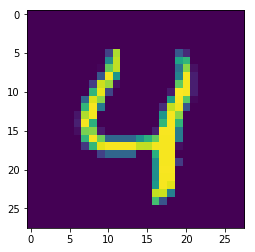

In [15]:
plt.imshow(x_test[4].reshape(28,28))

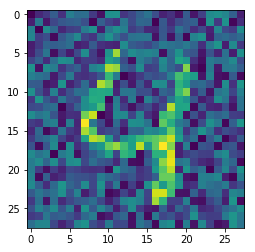

In [16]:
plt.imshow(x_test_noise[4].reshape(28,28))

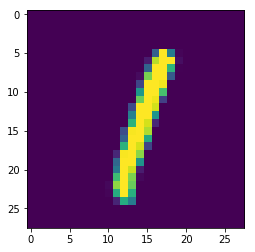

In [17]:
plt.imshow(x_test[5].reshape(28,28))

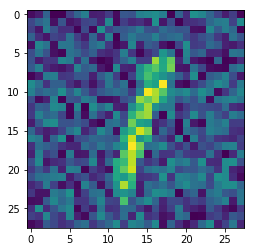

In [18]:
plt.imshow(x_test_noise[5].reshape(28,28))

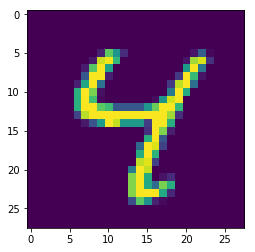

In [19]:
plt.imshow(x_test[6].reshape(28,28))

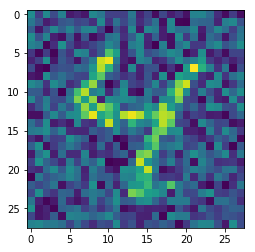

In [20]:
plt.imshow(x_test_noise[6].reshape(28,28))

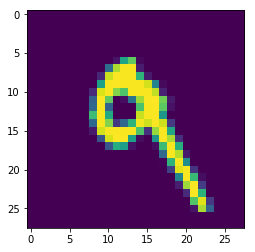

In [21]:
plt.imshow(x_test[7].reshape(28,28))

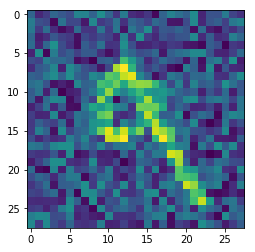

In [22]:
plt.imshow(x_test_noise[7].reshape(28,28))

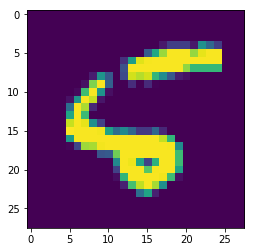

In [23]:
plt.imshow(x_test[8].reshape(28,28))

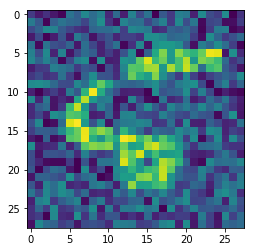

In [24]:
plt.imshow(x_test_noise[8].reshape(28,28))

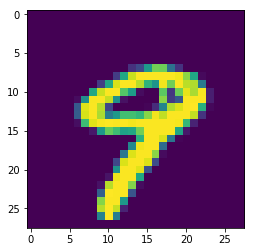

In [25]:
plt.imshow(x_test[9].reshape(28,28))

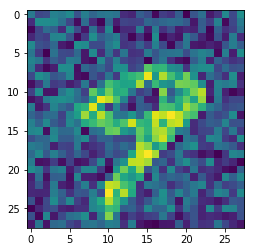

In [26]:
plt.imshow(x_test_noise[9].reshape(28,28))

#### Conv Net

In [27]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
x_train_noise = x_train + np.random.rand(*x_train.shape)
x_test_noise = x_test + np.random.rand(*x_test.shape)

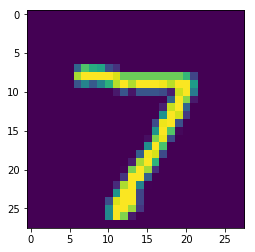

In [57]:
plt.imshow(x_test[0].reshape(28,28))

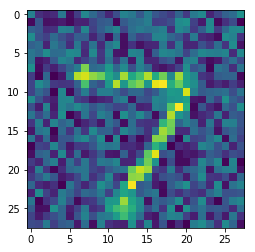

In [58]:
plt.imshow(x_test_noise[0].reshape(28,28))

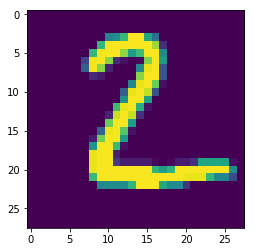

In [59]:
plt.imshow(x_test[1].reshape(28,28))

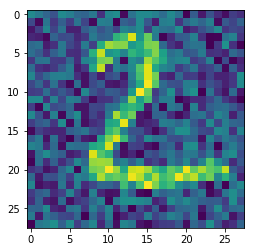

In [60]:
plt.imshow(x_test_noise[1].reshape(28,28))

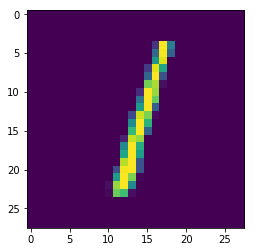

In [61]:
plt.imshow(x_test[2].reshape(28,28))

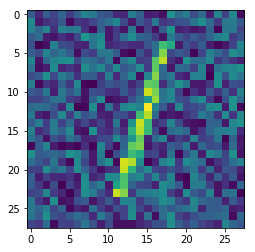

In [62]:
plt.imshow(x_test_noise[2].reshape(28,28))

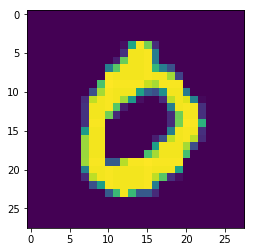

In [63]:
plt.imshow(x_test[3].reshape(28,28))

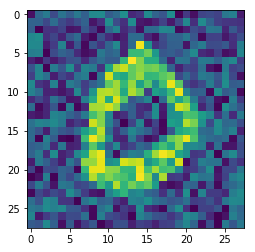

In [64]:
plt.imshow(x_test_noise[3].reshape(28,28))

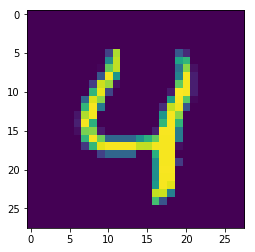

In [65]:
plt.imshow(x_test[4].reshape(28,28))

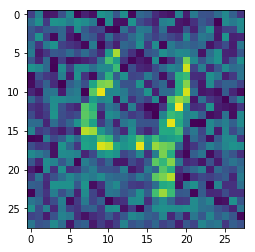

In [66]:
plt.imshow(x_test_noise[4].reshape(28,28))

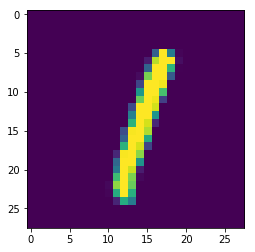

In [67]:
plt.imshow(x_test[5].reshape(28,28))

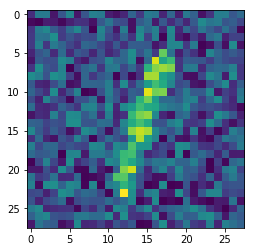

In [68]:
plt.imshow(x_test_noise[5].reshape(28,28))

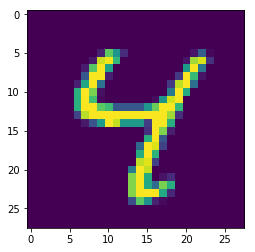

In [69]:
plt.imshow(x_test[6].reshape(28,28))

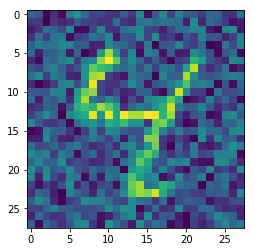

In [70]:
plt.imshow(x_test_noise[6].reshape(28,28))

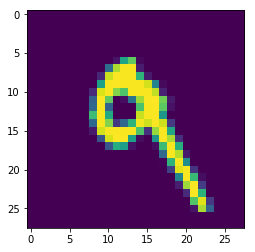

In [71]:
plt.imshow(x_test[7].reshape(28,28))

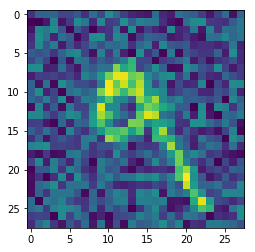

In [72]:
plt.imshow(x_test_noise[7].reshape(28,28))

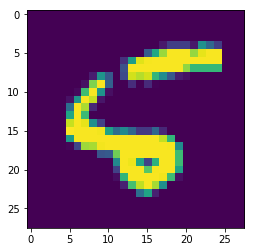

In [73]:
plt.imshow(x_test[8].reshape(28,28))

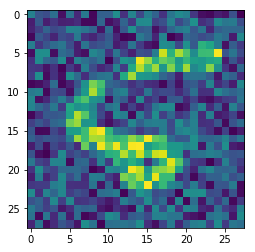

In [74]:
plt.imshow(x_test_noise[8].reshape(28,28))

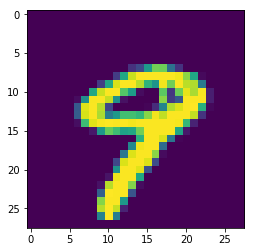

In [75]:
plt.imshow(x_test[9].reshape(28,28))

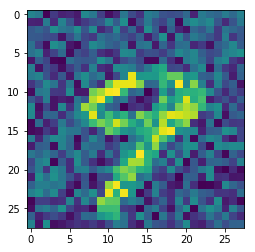

In [76]:
plt.imshow(x_test_noise[9].reshape(28,28))

#### 2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 

##### (i) MLNN without noise

In [5]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test, y_test))

score_1 = model1.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.248

In [28]:
model1.predict(x_test[0:1]), y_test[:1]

(array([[7.3683246e-34, 3.0756511e-29, 8.6811778e-27, 3.9515359e-21,
         8.2956772e-29, 8.6004934e-33, 0.0000000e+00, 1.0000000e+00,
         9.9805308e-30, 5.2909986e-17]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [29]:
model1.predict_classes(x_test[0:1]), y_test[:1]

(array([7], dtype=int64),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

##### (ii) MLNN with noise

In [6]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model_n1 = Sequential()
model_n1.add(Dense(512, activation='relu', input_shape=(784,)))
model_n1.add(Dropout(0.2))
model_n1.add(Dense(512, activation='relu'))
model_n1.add(Dropout(0.2))
model_n1.add(Dense(10, activation='softmax'))

model_n1.summary()

model_n1.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

model_n1.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
             validation_data=(x_test_noise, y_test))

score_n1 = model_n1.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_n1[0])
print('Test accuracy:', score_n1[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.864

In [30]:
model_n1.predict(x_test_noise[0:1]), y_test[:1]

(array([[1.01362297e-22, 4.87903243e-20, 2.07653881e-13, 1.77301507e-11,
         4.21808556e-21, 6.65219612e-15, 5.34679024e-34, 1.00000000e+00,
         7.22950272e-19, 4.51763488e-10]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [31]:
model_n1.predict_classes(x_test_noise[0:1]), y_test[:1]

(array([7], dtype=int64),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [46]:
print('MLNN without noise:', 'Test loss = ', score_1[0], ',', 'Test accuracy = ', score_1[1])
print('MLNN with noise:', 'Test loss = ', score_n1[0], ',', 'Test accuracy = ', score_n1[1])

MLNN without noise: Test loss =  0.12316138558134081 , Test accuracy =  0.9814
MLNN with noise: Test loss =  0.2201083564970945 , Test accuracy =  0.9523


After 20 epochs, we can see that the model without noise has 98.14% of test accuracy and 12.31% of test loss. On the other hand, the model with noise has 95.23% of test accuracy and 22.01% of test loss.

##### (iii) Conv Net without noise

In [29]:
batch_size = 128
num_classes = 10
epochs = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
           validation_data=(x_test, y_test))

score_2 = model2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.2640 - acc: 0.9210 - val_loss: 0.0557 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0877 - acc: 0.9737 - val_loss: 0.0441 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0680 - acc: 0.9797 - val_loss: 0.0356 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0548 - acc: 0.9841 - val_loss: 0.0346 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0333 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0403 - acc: 0.9876 - val_loss: 0.0325 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0384 - acc: 0.9885 - val_loss: 0.0268 - 

In [30]:
model2.predict(x_test[0:1]), y_test[:1]

(array([[2.55812350e-11, 1.26184341e-09, 5.51306945e-10, 2.23188845e-09,
         7.07254394e-12, 1.28507112e-12, 2.37184895e-16, 1.00000000e+00,
         1.68099267e-11, 1.22580035e-08]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [31]:
model2.predict_classes(x_test[0:1]), y_test[:1]

(array([7], dtype=int64),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

##### (iv) Conv Net with noise

In [21]:
batch_size = 128
num_classes = 10
epochs = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_n2 = Sequential()
model_n2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_n2.add(Conv2D(64, (3, 3), activation='relu'))
model_n2.add(MaxPooling2D(pool_size=(2, 2)))
model_n2.add(Dropout(0.25))
model_n2.add(Flatten())
model_n2.add(Dense(128, activation='relu'))
model_n2.add(Dropout(0.5))
model_n2.add(Dense(num_classes, activation='softmax'))

model_n2.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_n2.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_n2 = model_n2.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_n2[0])
print('Test accuracy:', score_n2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 235s 4ms/step - loss: 0.4095 - acc: 0.8692 - val_loss: 0.0941 - val_acc: 0.9710
Epoch 2/10
60000/60000 [==============================] - 230s 4ms/step - loss: 0.1359 - acc: 0.9585 - val_loss: 0.0780 - val_acc: 0.9758
Epoch 3/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1029 - acc: 0.9687 - val_loss: 0.0620 - val_acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0849 - acc: 0.9745 - val_loss: 0.0536 - val_acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0729 - acc: 0.9773 - val_loss: 0.0613 - val_acc: 0.9815
Epoch 6/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0644 - acc: 0.9803 - val_loss: 0.0505 - val_acc: 0.9844
Epoch 7/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0591 - acc: 0.9823 - val_loss: 0.0517 - 

In [22]:
score_n2 = model_n2.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_n2[0])
print('Test accuracy:', score_n2[1])

Test loss: 0.05877980903846697
Test accuracy: 0.9837


In [23]:
model_n2.predict(x_test_noise[0:1]), y_test[:1]

(array([[1.4211991e-16, 4.5195603e-16, 4.8507303e-13, 2.1392671e-12,
         1.1355564e-19, 8.8082782e-18, 1.4553011e-24, 1.0000000e+00,
         4.1096430e-18, 7.8545573e-12]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [24]:
model_n2.predict_classes(x_test_noise[0:1]), y_test[:1]

(array([7], dtype=int64),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [32]:
print('Conv Net without noise:', 'Test loss = ', score_2[0], ',', 'Test accuracy = ', score_2[1])
print('Conv Net with noise:', 'Test loss = ', score_n2[0], ',', 'Test accuracy = ', score_n2[1])

Conv Net without noise: Test loss =  0.027436911533749206 , Test accuracy =  0.9913
Conv Net with noise: Test loss =  0.05877980903846697 , Test accuracy =  0.9837


After 10 epochs, we can see that the model without noise has 99.13% of test accuracy and 2.74% of test loss. On the other hand, the model with noise has 98.37% of test accuracy and 5.87% of test loss.

#### 3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

C:\Users\Anchee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### MLNN

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dropout(0.2))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test, y_test))

score_3 = model3.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.249

In [21]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 0.199

x_train_noise = x_train + 0.199*np.random.rand(*x_train.shape)
x_test_noise = x_test + 0.199*np.random.rand(*x_test.shape)

model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

model4.summary()

model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model4.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_4 = model4.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.335

In [22]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 0.353

x_train_noise = x_train + 0.353*np.random.rand(*x_train.shape)
x_test_noise = x_test + 0.353*np.random.rand(*x_test.shape)

model5 = Sequential()
model5.add(Dense(512, activation='relu', input_shape=(784,)))
model5.add(Dropout(0.2))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))

model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model5.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_5 = model5.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_5[0])
print('Test accuracy:', score_5[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.423

In [23]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 0.857

x_train_noise = x_train + 0.857*np.random.rand(*x_train.shape)
x_test_noise = x_test + 0.857*np.random.rand(*x_test.shape)

model6 = Sequential()
model6.add(Dense(512, activation='relu', input_shape=(784,)))
model6.add(Dropout(0.2))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='softmax'))

model6.summary()

model6.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model6.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_6 = model6.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_6[0])
print('Test accuracy:', score_6[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.775

In [24]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 1.106

x_train_noise = x_train + 1.106*np.random.rand(*x_train.shape)
x_test_noise = x_test + 1.106*np.random.rand(*x_test.shape)

model7 = Sequential()
model7.add(Dense(512, activation='relu', input_shape=(784,)))
model7.add(Dropout(0.2))
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='softmax'))

model7.summary()

model7.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model7.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_7 = model7.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_7[0])
print('Test accuracy:', score_7[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.957

In [25]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 1.981

x_train_noise = x_train + 1.981*np.random.rand(*x_train.shape)
x_test_noise = x_test + 1.981*np.random.rand(*x_test.shape)

model8 = Sequential()
model8.add(Dense(512, activation='relu', input_shape=(784,)))
model8.add(Dropout(0.2))
model8.add(Dense(512, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(10, activation='softmax'))

model8.summary()

model8.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model8.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_8 = model8.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_8[0])
print('Test accuracy:', score_8[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 1.492

In [26]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 2.524

x_train_noise = x_train + 2.524*np.random.rand(*x_train.shape)
x_test_noise = x_test + 2.524*np.random.rand(*x_test.shape)

model9 = Sequential()
model9.add(Dense(512, activation='relu', input_shape=(784,)))
model9.add(Dropout(0.2))
model9.add(Dense(512, activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(10, activation='softmax'))

model9.summary()

model9.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model9.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_9 = model9.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_9[0])
print('Test accuracy:', score_9[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 228us/step - loss: 1.740

In [36]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 3.80

x_train_noise = x_train + 3.80*np.random.rand(*x_train.shape)
x_test_noise = x_test + 3.80*np.random.rand(*x_test.shape)

model10 = Sequential()
model10.add(Dense(512, activation='relu', input_shape=(784,)))
model10.add(Dropout(0.2))
model10.add(Dense(512, activation='relu'))
model10.add(Dropout(0.2))
model10.add(Dense(10, activation='softmax'))

model10.summary()

model10.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model10.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_10 = model10.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_10[0])
print('Test accuracy:', score_10[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 229us/step - loss: 2.388

In [37]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 4.201

x_train_noise = x_train + 4.201*np.random.rand(*x_train.shape)
x_test_noise = x_test + 4.201*np.random.rand(*x_test.shape)

model11 = Sequential()
model11.add(Dense(512, activation='relu', input_shape=(784,)))
model11.add(Dropout(0.2))
model11.add(Dense(512, activation='relu'))
model11.add(Dropout(0.2))
model11.add(Dense(10, activation='softmax'))

model11.summary()

model11.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model11.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_11 = model11.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_11[0])
print('Test accuracy:', score_11[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 231us/step - loss: 2.313

In [38]:
batch_size = 128
num_classes = 10
epochs = 20
noise = 5.555

x_train_noise = x_train + 5.555*np.random.rand(*x_train.shape)
x_test_noise = x_test + 5.555*np.random.rand(*x_test.shape)

model12 = Sequential()
model12.add(Dense(512, activation='relu', input_shape=(784,)))
model12.add(Dropout(0.2))
model12.add(Dense(512, activation='relu'))
model12.add(Dropout(0.2))
model12.add(Dense(10, activation='softmax'))

model12.summary()

model12.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model12.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(x_test_noise, y_test))

score_12 = model12.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_12[0])
print('Test accuracy:', score_12[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 14.47

In [46]:
print(score_3, score_4, score_5, score_6, score_7, score_8, score_9, score_10, score_11, score_12)

[0.09809925168283021, 0.9849] [0.12304341591782558, 0.9794] [0.15589919155727913, 0.9721] [0.16978696702679363, 0.9647] [0.254058855293601, 0.9484] [0.442903331239894, 0.8755] [0.4914227172911167, 0.8504] [0.8849401501655578, 0.7059] [1.1451369124412536, 0.618] [14.28869146270752, 0.1135]


In [17]:
Loss = (0.09809925168283021, 0.12304341591782558, 0.15589919155727913, 0.16978696702679363, 0.254058855293601, 
        0.442903331239894,0.4914227172911167, 0.8849401501655578, 1.1451369124412536, 14.28869146270752)
Accuracy = (0.9849, 0.9794, 0.9721, 0.9647, 0.9484, 0.8755, 0.8504, 0.7059, 0.618, 0.1135)

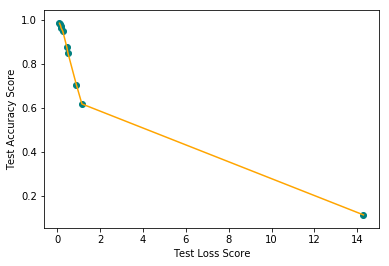

In [18]:
plt.scatter(Loss, Accuracy, color = "teal")
plt.plot(Loss, Accuracy, color = "orange")
plt.xlabel('Test Loss Score')
plt.ylabel('Test Accuracy Score')
plt.show()

#### Conv Net

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 5

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model13 = Sequential()
model13.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model13.add(Conv2D(64, (3, 3), activation='relu'))
model13.add(MaxPooling2D(pool_size=(2, 2)))
model13.add(Dropout(0.25))
model13.add(Flatten())
model13.add(Dense(128, activation='relu'))
model13.add(Dropout(0.5))
model13.add(Dense(num_classes, activation='softmax'))

model13.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model13.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
           validation_data=(x_test, y_test))

score_13 = model13.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_13[0])
print('Test accuracy:', score_13[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 218s 4ms/step - loss: 0.2617 - acc: 0.9192 - val_loss: 0.0583 - val_acc: 0.9820
Epoch 2/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0862 - acc: 0.9738 - val_loss: 0.0434 - val_acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0645 - acc: 0.9804 - val_loss: 0.0346 - val_acc: 0.9884
Epoch 4/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0443 - acc: 0.9865 - val_loss: 0.0325 - val_acc: 0.9892
Test loss: 0.03254376709989301
Test accuracy: 0.9892


In [6]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 0.199

x_train_noise = x_train + 0.199*np.random.rand(*x_train.shape)
x_test_noise = x_test + 0.199*np.random.rand(*x_test.shape)

model_14 = Sequential()
model_14.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_14.add(Conv2D(64, (3, 3), activation='relu'))
model_14.add(MaxPooling2D(pool_size=(2, 2)))
model_14.add(Dropout(0.25))
model_14.add(Flatten())
model_14.add(Dense(128, activation='relu'))
model_14.add(Dropout(0.5))
model_14.add(Dense(num_classes, activation='softmax'))

model_14.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_14.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_14 = model_14.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_14[0])
print('Test accuracy:', score_14[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 210s 4ms/step - loss: 0.2814 - acc: 0.9137 - val_loss: 0.0598 - val_acc: 0.9804
Epoch 2/5
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0933 - acc: 0.9727 - val_loss: 0.0407 - val_acc: 0.9867
Epoch 3/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0694 - acc: 0.9798 - val_loss: 0.0375 - val_acc: 0.9875
Epoch 4/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0574 - acc: 0.9829 - val_loss: 0.0307 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0490 - acc: 0.9854 - val_loss: 0.0299 - val_acc: 0.9895
Test loss: 0.029869548104674324
Test accuracy: 0.9895


In [7]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 0.353

x_train_noise = x_train + 0.199*np.random.rand(*x_train.shape)
x_test_noise = x_test + 0.199*np.random.rand(*x_test.shape)

model_14 = Sequential()
model_14.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_14.add(Conv2D(64, (3, 3), activation='relu'))
model_14.add(MaxPooling2D(pool_size=(2, 2)))
model_14.add(Dropout(0.25))
model_14.add(Flatten())
model_14.add(Dense(128, activation='relu'))
model_14.add(Dropout(0.5))
model_14.add(Dense(num_classes, activation='softmax'))

model_14.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_14.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_14 = model_14.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_14[0])
print('Test accuracy:', score_14[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.2642 - acc: 0.9187 - val_loss: 0.0557 - val_acc: 0.9822
Epoch 2/5
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0897 - acc: 0.9740 - val_loss: 0.0417 - val_acc: 0.9869
Epoch 3/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0663 - acc: 0.9804 - val_loss: 0.0362 - val_acc: 0.9879
Epoch 4/5
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0566 - acc: 0.9826 - val_loss: 0.0361 - val_acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0468 - acc: 0.9859 - val_loss: 0.0321 - val_acc: 0.9889
Test loss: 0.03207912145863811
Test accuracy: 0.9889


In [8]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 1.106

x_train_noise = x_train + 1.106*np.random.rand(*x_train.shape)
x_test_noise = x_test + 1.106*np.random.rand(*x_test.shape)

model_15 = Sequential()
model_15.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_15.add(Conv2D(64, (3, 3), activation='relu'))
model_15.add(MaxPooling2D(pool_size=(2, 2)))
model_15.add(Dropout(0.25))
model_15.add(Flatten())
model_15.add(Dense(128, activation='relu'))
model_15.add(Dropout(0.5))
model_15.add(Dense(num_classes, activation='softmax'))

model_15.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_15.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_15 = model_15.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_15[0])
print('Test accuracy:', score_15[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.4422 - acc: 0.8585 - val_loss: 0.1063 - val_acc: 0.9680
Epoch 2/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.1517 - acc: 0.9535 - val_loss: 0.0811 - val_acc: 0.9757
Epoch 3/5
60000/60000 [==============================] - 205s 3ms/step - loss: 0.1167 - acc: 0.9651 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0952 - acc: 0.9710 - val_loss: 0.0617 - val_acc: 0.9807
Epoch 5/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0829 - acc: 0.9751 - val_loss: 0.0614 - val_acc: 0.9812
Test loss: 0.06135167547047022
Test accuracy: 0.9812


In [9]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 2.524

x_train_noise = x_train + 2.524*np.random.rand(*x_train.shape)
x_test_noise = x_test + 2.524*np.random.rand(*x_test.shape)

model_16 = Sequential()
model_16.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_16.add(Conv2D(64, (3, 3), activation='relu'))
model_16.add(MaxPooling2D(pool_size=(2, 2)))
model_16.add(Dropout(0.25))
model_16.add(Flatten())
model_16.add(Dense(128, activation='relu'))
model_16.add(Dropout(0.5))
model_16.add(Dense(num_classes, activation='softmax'))

model_16.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_16.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_16 = model_16.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_16[0])
print('Test accuracy:', score_16[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 202s 3ms/step - loss: 1.1208 - acc: 0.6132 - val_loss: 0.4169 - val_acc: 0.8718
Epoch 2/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.4748 - acc: 0.8479 - val_loss: 0.3085 - val_acc: 0.9026
Epoch 3/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.3915 - acc: 0.8752 - val_loss: 0.2796 - val_acc: 0.9120
Epoch 4/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.3443 - acc: 0.8904 - val_loss: 0.2551 - val_acc: 0.9184
Epoch 5/5
60000/60000 [==============================] - 207s 3ms/step - loss: 0.3061 - acc: 0.9025 - val_loss: 0.2347 - val_acc: 0.9271
Test loss: 0.23474875639528037
Test accuracy: 0.9271


In [10]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 3.80

x_train_noise = x_train + 3.80*np.random.rand(*x_train.shape)
x_test_noise = x_test + 3.80*np.random.rand(*x_test.shape)

model_17 = Sequential()
model_17.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_17.add(Conv2D(64, (3, 3), activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2, 2)))
model_17.add(Dropout(0.25))
model_17.add(Flatten())
model_17.add(Dense(128, activation='relu'))
model_17.add(Dropout(0.5))
model_17.add(Dense(num_classes, activation='softmax'))

model_17.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_17.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_17 = model_17.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_17[0])
print('Test accuracy:', score_17[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 209s 3ms/step - loss: 1.4989 - acc: 0.4725 - val_loss: 0.7832 - val_acc: 0.7524
Epoch 2/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.8652 - acc: 0.7142 - val_loss: 0.6106 - val_acc: 0.8020
Epoch 3/5
60000/60000 [==============================] - 200s 3ms/step - loss: 0.6798 - acc: 0.7788 - val_loss: 0.4730 - val_acc: 0.8444
Epoch 4/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.5845 - acc: 0.8076 - val_loss: 0.4508 - val_acc: 0.8547
Epoch 5/5
60000/60000 [==============================] - 201s 3ms/step - loss: 0.5184 - acc: 0.8311 - val_loss: 0.4068 - val_acc: 0.8669
Test loss: 0.40681011052131655
Test accuracy: 0.8669


In [11]:
batch_size = 128
num_classes = 10
epochs = 5
noise = 4.201

x_train_noise = x_train + 4.201*np.random.rand(*x_train.shape)
x_test_noise = x_test + 4.201*np.random.rand(*x_test.shape)

model_18 = Sequential()
model_18.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_18.add(Conv2D(64, (3, 3), activation='relu'))
model_18.add(MaxPooling2D(pool_size=(2, 2)))
model_18.add(Dropout(0.25))
model_18.add(Flatten())
model_18.add(Dense(128, activation='relu'))
model_18.add(Dropout(0.5))
model_18.add(Dense(num_classes, activation='softmax'))

model_18.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model_18.fit(x_train_noise, y_train, batch_size=batch_size, epochs=epochs, 
             verbose=1, validation_data=(x_test_noise, y_test))

score_18 = model_18.evaluate(x_test_noise, y_test, verbose=0)

print('Test loss:', score_18[0])
print('Test accuracy:', score_18[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 203s 3ms/step - loss: 1.6643 - acc: 0.4125 - val_loss: 0.9624 - val_acc: 0.6813
Epoch 2/5
60000/60000 [==============================] - 200s 3ms/step - loss: 0.9408 - acc: 0.6881 - val_loss: 0.6283 - val_acc: 0.7907
Epoch 3/5
60000/60000 [==============================] - 213s 4ms/step - loss: 0.7185 - acc: 0.7650 - val_loss: 0.5118 - val_acc: 0.8352
Epoch 4/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.6163 - acc: 0.7999 - val_loss: 0.4663 - val_acc: 0.8493
Epoch 5/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.5509 - acc: 0.8196 - val_loss: 0.4690 - val_acc: 0.8455
Test loss: 0.46896857718229296
Test accuracy: 0.8455


In [12]:
print(score_13, score_14, score_15, score_16, score_17, score_18)

[0.03254376709989301, 0.9892] [0.03207912145863811, 0.9889] [0.06135167547047022, 0.9812] [0.23474875639528037, 0.9271] [0.40681011052131655, 0.8669] [0.46896857718229296, 0.8455]


In [13]:
loss = (0.03254376709989301, 0.03207912145863811, 0.06135167547047022, 0.23474875639528037, 0.40681011052131655
       ,0.46896857718229296)
accuracy = (0.9892, 0.9889, 0.9812, 0.9271, 0.8669, 0.8455)

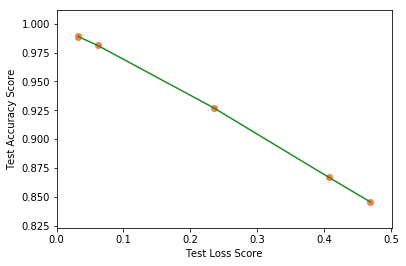

In [15]:
plt.scatter(loss, accuracy, color = "coral")
plt.plot(loss, accuracy, color = "forestgreen")
plt.xlabel('Test Loss Score')
plt.ylabel('Test Accuracy Score')
plt.show()